<h1>Statistic Test</h1>

Input Data

In [1]:
import pandas as pd

# Read the data
df = pd.read_csv('D:/Langara College/CPSC4800/media.csv')

# Convert dates from string to datetime objects
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# Remove any duplicate entries
df.drop_duplicates(inplace=True)

<h1>Categorical Variables Tests</h1>

t-test:
Two-sample t-test: Compares the means of two independent groups.

In [2]:
from scipy import stats

active_pageviews = df[df['Subscription_Status'] == 'Active']['Pageviews_First_7_Days']
canceled_pageviews = df[df['Subscription_Status'] == 'Canceled']['Pageviews_First_7_Days']

t_stat, p_val = stats.ttest_ind(active_pageviews, canceled_pageviews, nan_policy='omit')
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: -3.415347659525557, P-value: 0.0006435153115256579


ANOVA:
To test if the means of Pageviews_First_7_Days are the same across all different Subscription_Status

Note: ANOVA can only show there is at least one group being different. But it did NOT tell which group.
So, in general, if the number of groups is little, say 4 or 5 groups, we can do it by hand with t-test.
if the number of groups is large, say 1000 groups, we can use ANOVA.

In [8]:
# Group the data by 'Subscription_Status'
groups = df.groupby('Subscription_Status')['Pageviews_First_7_Days']

means = df.groupby('Subscription_Status')['Pageviews_First_7_Days'].mean()
print(means)

# Perform ANOVA
f_val, p_val = stats.f_oneway(*[group for name, group in groups])

print(f'ANOVA test statistics: {f_val}')
print(f'P-value: {p_val}')


Subscription_Status
Active            36.266780
Canceled          46.796748
Expired           45.210204
Payment failed    36.942529
Upgraded           0.000000
Name: Pageviews_First_7_Days, dtype: float64
ANOVA test statistics: 5.393765044719592
P-value: 0.0002482185463237465


C:\Users\yeung\AppData\Local\Temp\ipykernel_9204\2010733806.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby('Subscription_Status')['Pageviews_First_7_Days']
C:\Users\yeung\AppData\Local\Temp\ipykernel_9204\2010733806.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('Subscription_Status')['Pageviews_First_7_Days'].mean()


Chi-Square test:
Does it a matter for Subscription_Status and Publication_Name?

Note:  Each expected count should be at least 5 for the Chi-Square test to be valid. If some expected counts are less than 5, consider combining some categories or using Fisher's Exact Test if it's a 2x2 table.
For our example, we have to combine different groups. But that would be your task.

In [6]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Publication_Name'], df['Subscription_Status'])

print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')



Subscription_Status    Active  Canceled  Expired  Payment failed  Upgraded
Publication_Name                                                          
Calgary Herald            308        23       39              63         0
Calgary Sun                89        11        5              25         0
Edmonton Journal           63        10        8               7         0
Edmonton Sun               90        12        8              20         0
Financial Post            485        25       13              18         0
London Free Press         193        11       11               9         0
Montreal Gazette           53        13       15               9         0
National Post            1442       153      245             294         1
Ottawa Citizen             27        16       15               6         0
Ottawa Sun                 77        11       12              22         0
Regina Leader-Post          5         0        0               1         0
Saskatoon StarPhoenix    

<h1>Continuous Variables Tests</h1>

Pearson Correlation:
To measure the strength of the linear relationship between two continuous variables.

It is the same as Correlation. Use pearsonr can give you the p-value.

In [9]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value
corr_coefficient, p_value = pearsonr(df['Pageviews_First_7_Days'], df['Pageviews_Total_Within_Term'])

print(f'Pearson correlation coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')


Pearson correlation coefficient: 0.6250597803605256
P-value: 0.0


Spearman Correlation:
To measure the relationship between two ranked (ordinal) or not normally distributed continuous variables.

Note: In this example, we do NOT have any ordinal variable. Here we put the same variables as above, but please remember, it is WRONG!
The key point here is to let you know you can use this code.


In [2]:
from scipy.stats import spearmanr

# Calculate the Spearman correlation coefficient using scipy
spearman_corr_coefficient, p_value = spearmanr(df['Pageviews_First_7_Days'], df['Pageviews_Total_Within_Term'])

print(f'Spearman correlation coefficient: {spearman_corr_coefficient}')
print(f'P-value: {p_value}')


Spearman correlation coefficient: 0.7951666312994066
P-value: 0.0


Linear Regression: 
To understand the relationship between a single predictor (independent variable) and a response (dependent variable).

Note:
1. do the standardize process for continuous variables.
2. In Python, scikit-learn's LinearRegression does not provide a summary table. If you're looking for a summary output similar to what is provided by the lm() function in R, which includes R-squared, coefficient estimates, standard errors, p-values, and more, you'll want to use statsmodels.
3. F-Statistics means if the model valid.
4. Adjusted R-square means how much variance being explained
5. Coefficients means beta and p-values means if this variables should be included in the model or not. (x4 and x5 should be removed in this case)
   

In [12]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Prepare the feature matrix (X) and the target vector (y)
features = ['Pageviews_First_7_Days', 'Pageviews_Total_Within_Term', 
            'Avg_Monthly_Pageviews_Within_Term', 'Pageviews_Last_30Days', 'Pageviews_Last_7Days']
X = df[features]
y = df['Account_Tenure']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a constant to the model (the intercept)
X_scaled_sm = sm.add_constant(X_scaled)

# Fit the model using statsmodels
model = sm.OLS(y, X_scaled_sm)
results = model.fit()

# Print the summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:         Account_Tenure   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     282.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          8.94e-267
Time:                        21:55:55   Log-Likelihood:                -30596.
No. Observations:                5000   AIC:                         6.120e+04
Df Residuals:                    4994   BIC:                         6.124e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.8730      1.556    114.949      0.0

Linear Regression with interaction
Note: you have to remove all p-values > 0.05 cases and re-build the model.

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Formula for the model: 'y ~ X1 * X2 * ... * Xn' 
# where * between two variables means both the main effects and the interaction effect
formula = 'Account_Tenure ~ Pageviews_First_7_Days * Pageviews_Total_Within_Term * Avg_Monthly_Pageviews_Within_Term * Pageviews_Last_30Days * Pageviews_Last_7Days'

# Build the model with all interaction terms
model = smf.ols(formula, data=df)
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         Account_Tenure   R-squared:                      -0.232
Model:                            OLS   Adj. R-squared:                 -0.240
Method:                 Least Squares   F-statistic:                    -32.31
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               1.00
Time:                        23:24:25   Log-Likelihood:                -31740.
No. Observations:                5000   AIC:                         6.354e+04
Df Residuals:                    4970   BIC:                         6.374e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------

<h1>Non-Parametric Tests</h1>

Mann-Whitney U test: 
Non-parametric alternative to the independent t-test.

Let's assume Pageviews_First_7_Days distribution is heavily skewed, not normally distributed.
We can replace the t-test above.

In [15]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Filter the dataset for two groups (e.g., 'Active' vs 'Canceled')
group1 = df[df['Subscription_Status'] == 'Active']['Pageviews_First_7_Days']
group2 = df[df['Subscription_Status'] == 'Canceled']['Pageviews_First_7_Days']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')


Statistic: 605078.0
P-value: 0.0241377179433829


Kruskal-Wallis test: 
Non-parametric alternative to ANOVA.

In [16]:
import pandas as pd
from scipy.stats import kruskal

# Extract data for each group
data_groups = []
for status in df['Subscription_Status'].unique():
    data_groups.append(df[df['Subscription_Status'] == status]['Pageviews_First_7_Days'])

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*data_groups)

print(f'Statistic: {stat}')
print(f'P-value: {p_value}')


Statistic: 21.834741762774325
P-value: 0.00021618548158502715


<h1>Check if the distribution of a variable (feature) is under normal distribution</h1>
KS Test

In [4]:
import numpy as np
from scipy import stats

# Extract the variable of interest
data = df['Avg_Monthly_Pageviews_Within_Term'].dropna()  # Dropping NaN values if any

# Calculate the sample mean and standard deviation
data_mean = np.mean(data)
data_std = np.std(data, ddof=1)

# Perform the KS test for normality
# Note: The 'cdf' parameter should be set to the CDF of a normal distribution with the same mean and std as the data
D, p_value = stats.kstest(data, 'norm', args=(data_mean, data_std))

print(f"KS statistic: {D}")
print(f"P-value: {p_value}")


KS statistic: 0.3094561725763033
P-value: 0.0


We can try to test if the variable distribution is under other distribution.
In this case, we tried Exponential distribution.

In [6]:
import numpy as np
from scipy import stats

# Assuming df is your DataFrame
# data = df['Avg_Monthly_Pageviews_Within_Term'].dropna()

# Estimate lambda (λ) as the inverse of the mean for the Exponential distribution
lambda_hat = 1 / np.mean(data)

# Perform the KS test against the Exponential distribution
D, p_value = stats.kstest(data, 'expon', args=(0, 1/lambda_hat))

print(f"KS statistic: {D}")
print(f"P-value: {p_value}")


KS statistic: 0.2657419455361001
P-value: 3.46229424878e-312


<h1>Check if the distribution of a variable (feature) is under normal distribution</h1>
Q-Q plot

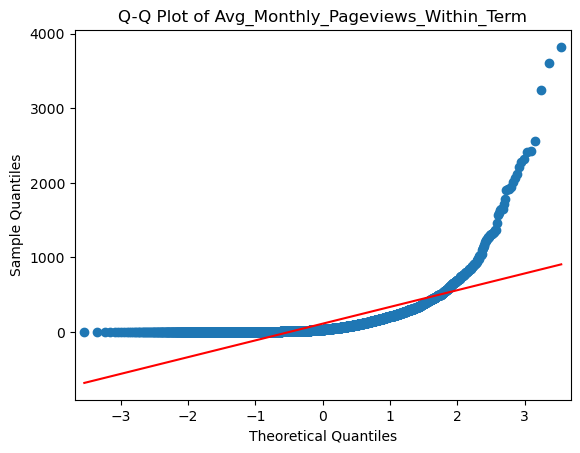

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q plot for Avg_Monthly_Pageviews_Within_Term
sm.qqplot(df['Avg_Monthly_Pageviews_Within_Term'].dropna(), line='s')
plt.title('Q-Q Plot of Avg_Monthly_Pageviews_Within_Term')
plt.show()

We can try to test if the variable distribution is under other distribution.
In this case, we tried Poisson distribution by Q-Q Plot.

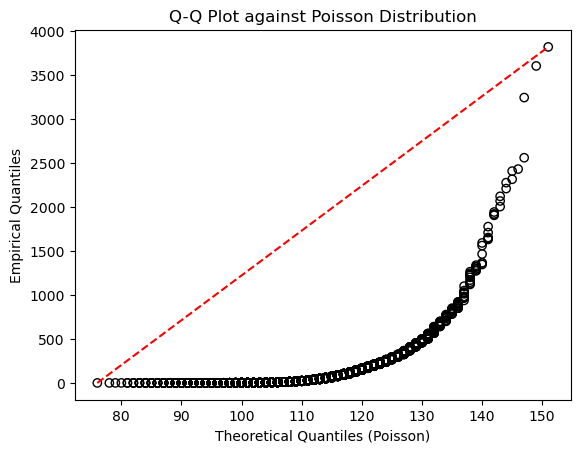

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample Data: Assuming this is your data column from the DataFrame
data = df['Avg_Monthly_Pageviews_Within_Term']

# Estimate the rate parameter λ (lambda) for Poisson distribution
lambda_hat = np.mean(data)

# Calculate Empirical Quantiles
data_sorted = np.sort(data)
percentiles = np.arange(1, len(data_sorted) + 1) / (len(data_sorted) + 1)

# Calculate Theoretical Quantiles for the Poisson Distribution
poisson_quantiles = stats.poisson.ppf(percentiles, lambda_hat)

# Plotting the Q-Q plot
plt.scatter(poisson_quantiles, data_sorted, edgecolor='k', facecolor='none')
plt.xlabel('Theoretical Quantiles (Poisson)')
plt.ylabel('Empirical Quantiles')
plt.title('Q-Q Plot against Poisson Distribution')
plt.plot([min(poisson_quantiles), max(poisson_quantiles)], [min(data_sorted), max(data_sorted)], 'r--')  # Line of equality
plt.show()

